In [1]:
import os
import requests
from zipfile import ZipFile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
r = requests.get(url, allow_redirects=True)
open('students.zip', 'wb').write(r.content)

20478

In [3]:
zip = ZipFile('students.zip')
zip.extractall()

In [4]:
current_path = os.getcwd()

In [5]:
data_path = os.path.join(current_path,'student-mat.csv')

In [6]:
data = pd.read_csv(data_path, sep=';')

In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
data = data[['G1','G2','G3','studytime','failures','absences']]

In [11]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [12]:
predict = 'G3'

In [13]:
x = np.array(data.drop(['G3'],1))

In [14]:
y = np.array(data[predict])

In [15]:
best = 0
accs = []
for _ in range(35):
    x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.1)
    linear = LinearRegression()
    linear.fit(x_train,y_train)
    
    acc = linear.score(x_test,y_test)
    accs.append(acc)
    if acc>best:
        best = acc
        print(acc)

#saving model
with open('studentmodel.pickle','wb') as f:
    pickle.dump(linear,f)
    

0.8796862459880845
0.9119533537569199
0.9213888907646604
0.933567056688648


In [20]:
bests

[0.8796862459880845,
 0.6016745870142005,
 0.8681540932110612,
 0.8370337272101018,
 0.753770700274857,
 0.9119533537569199,
 0.8239444885793359,
 0.7557347700385784,
 0.8396267725714385,
 0.8338068007067289,
 0.8385924739344108,
 0.8907097127049342,
 0.8996491010632918,
 0.8287515031936431,
 0.7706207495682376,
 0.8389392793228263,
 0.7687200463787203,
 0.7109669806130128,
 0.8815703053919025,
 0.7114412338042146,
 0.8743906416365764,
 0.855287753038687,
 0.7793439111793585,
 0.9213888907646604,
 0.8138384534820978,
 0.933567056688648,
 0.9140213664922082,
 0.8345075219906377,
 0.8026220214188121,
 0.8448196005598243,
 0.8789809773406743,
 0.7129897700905787,
 0.8107008665483181,
 0.8624601584417612,
 0.9074751998991171]

In [ ]:
#loading model
pickle_in = open('studentmodel.pickle','rb')
linear = pickle.load(pickle_in)

In [17]:
pred = linear.predict(x_test)

In [18]:
for x in range(len(pred)):
    print(pred[x],x_test[x],y_test[x])

9.436999613365273 [ 9 10  2  0  4] 10
6.8604124366456745 [ 9  7  2  1 20] 8
9.581889351936411 [10 10  2  0  4] 10
10.921288636680615 [13 11  2  0  2] 11
10.558912715488566 [ 9  9  2  0 56] 8
15.663936806709582 [16 15  2  0 11] 15
-0.8865973166289125 [12  0  3  2  0] 0
12.045985946362235 [12 12  1  0  4] 13
11.73896475409877 [11 12  1  0  0] 10
7.894089012558302 [10  8  1  0  6] 11
10.139004156866427 [ 9 11  3  0  2] 11
8.613335271180645 [9 9 2 0 8] 9
15.218075309055685 [16 15  2  0  0] 15
6.93230894710214 [7 8 4 0 8] 8
10.469255289017553 [11 11  4  0  8] 10
11.89979772435921 [12 12  2  1 12] 13
11.141194668917212 [12 11  2  0 11] 11
8.225248352071016 [8 9 2 0 2] 8
11.22791955287378 [11 12  3  1  4] 11
10.108816576436473 [10 10  2  0 17] 10
13.757016225628007 [13 14  3  0  4] 14
3.9592944932995797 [ 6  5  1  3 16] 5
10.469316497431784 [11 11  3  0  3] 11
8.056220466250629 [10  8  1  0 10] 9
18.17546269668655 [16 18  2  0  0] 19
7.951534523446503 [6 9 1 1 4] 8
9.14631192886141 [11  9  2 

In [30]:
p = 'failures'

In [26]:
style.use ('ggplot')

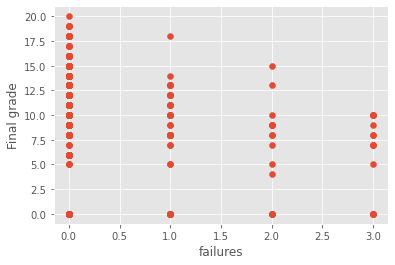

In [31]:
plt.scatter(data[p],data[predict])
plt.xlabel(p)
plt.ylabel('Final grade')
plt.show()

array([[<AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='studytime', ylabel='G1'>,
        <AxesSubplot:xlabel='failures', ylabel='G1'>,
        <AxesSubplot:xlabel='absences', ylabel='G1'>],
       [<AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='studytime', ylabel='G2'>,
        <AxesSubplot:xlabel='failures', ylabel='G2'>,
        <AxesSubplot:xlabel='absences', ylabel='G2'>],
       [<AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='studytime', ylabel='G3'>,
        <AxesSubplot:xlabel='failures', ylabel='G3'>,
        <AxesSubplot:xlabel='absences', ylabel='G3'>],
       [<AxesSubplot:xlabel='G1', ylabel='studytime'>,
        <AxesSubplot:

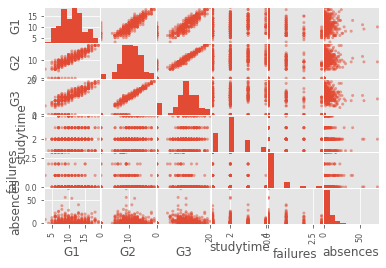

In [32]:
pd.plotting.scatter_matrix(data)

In [33]:
data.corr()

,G1,G2,G3,studytime,failures,absences
G1,1.000000,0.852118,0.801468,0.160612,-0.354718,-0.031003
G2,0.852118,1.000000,0.904868,0.135880,-0.355896,-0.031777
G3,0.801468,0.904868,1.000000,0.097820,-0.360415,0.034247
studytime,0.160612,0.135880,0.097820,1.000000,-0.173563,-0.062700
failures,-0.354718,-0.355896,-0.360415,-0.173563,1.000000,0.063726
absences,-0.031003,-0.031777,0.034247,-0.062700,0.063726,1.000000
